In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob

from utils.plotter import Plotter
from utils.data_handler import DataHandler

Plotter.change_folder("figs_compar_filters")
spin_up_days = 7
start_date = "2014-06-01"
end_date = "2014-08-31"
assimilation_end_date = "2014-06-09"
assimilation_steps = 15

noos_folder = "/home/mverlaan/einf220/fromDavid/gtsm_openDA_david/stochObserver/noos_cmems"
noos_file = lambda station: os.path.join(noos_folder, f"timeseries_{start_date}_{end_date}_{station}_averaged.noos")
locs_file = "/home/mverlaan/einf220/fromDavid/gtsm_openDA_david/stochModel/input_dflowfm/grid_locs.xyn"

labels = ["Simulation", "No loc", "Loc"]
av_files = ["./simulation_bias20/gtsm_fine_0000_averaged_his.nc",
            "./output_bias20_no_loc/work0/output/full_gtsm_fine_averaged_0000_his.nc",
            "./output_bias20_loc/work0/output/full_gtsm_fine_averaged_0000_his.nc"]

In [8]:
rmses_per_exp = []
for av_file in av_files:
    xs_locs, ys_locs, stations = DataHandler.read_xyn(locs_file)
    nc = xr.open_dataset(av_file)

    stations_his = nc.station_name.values.tolist()
    stations_his = np.array([s.decode("utf-8").strip() for s in stations_his])
    nc["station_name"] = ("stations", stations_his)

    rmses = []
    for station in stations:
        # Get observations
        ts_obs, obs = DataHandler.read_noos(noos_file(station))

        # Get model results
        station_data = nc.where(nc.station_name == station).dropna("stations")
        sim = station_data.waterlevel.values.squeeze()
        ts = station_data.time.values.squeeze()

        data1 = obs[: assimilation_steps - spin_up_days]
        data2 = sim[spin_up_days:assimilation_steps]
        rmses.append(np.sqrt(((data1 - data2) ** 2).mean()))

        # Plot results
        # title_func = lambda s: f"Averaged water level at {s}"
        # observations = [ts_obs, obs]
        # Plotter.plot_series(
        #     [ts], [sim], station, title_func, obs_data=observations, legends=["No filter"]
        # )
    rmses_per_exp.append(rmses)

<Figure size 640x480 with 0 Axes>

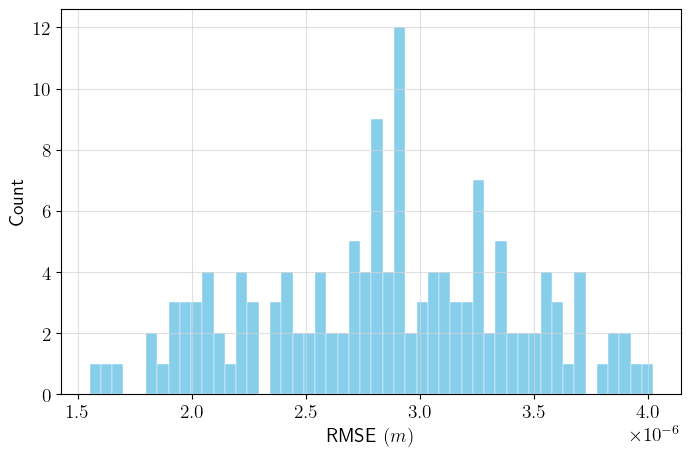

<Figure size 640x480 with 0 Axes>

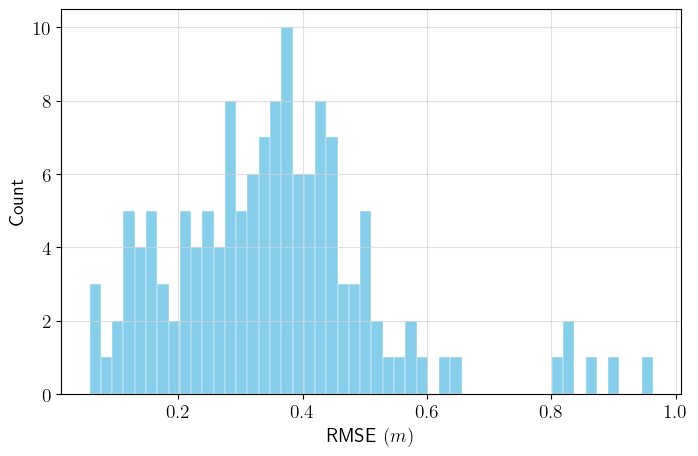

<Figure size 640x480 with 0 Axes>

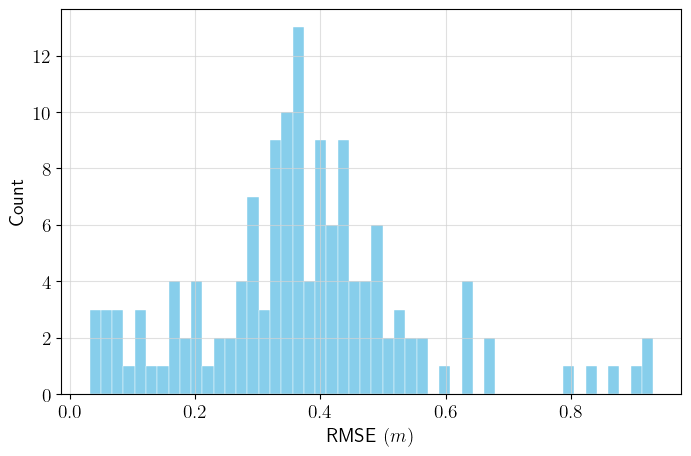

In [9]:
for rmses in rmses_per_exp:
    Plotter.hist(
        rmses,
        bins=50,
        path="hist_rmses.pdf",
        xlabel="RMSE $(m)$",
        ylabel="Count",
    )
    plt.show()

In [2]:
xr.load_dataset(
    "/home/mverlaan/einf220/fromDavid/saved_results/gtsm/kg_backwards/kgStorage_201406020000/kalmanGainStorage.nc"
)

<xarray.Dataset>
Dimensions:             (time_stamp_dimension: 1, station_dimension: 4,
                         2DPressureNoise_dimension_0: 181,
                         2DPressureNoise_dimension_1: 361,
                         s1_0000_dimension_0: 99851,
                         s1_0001_dimension_0: 99206,
                         s1_0002_dimension_0: 99400,
                         ...
                         s1_0013_dimension_0: 99941,
                         s1_0014_dimension_0: 99098,
                         s1_0015_dimension_0: 98516,
                         s1_0016_dimension_0: 99235,
                         s1_0017_dimension_0: 98651,
                         s1_0018_dimension_0: 98360, s1_0019_dimension_0: 99622)
Dimensions without coordinates: time_stamp_dimension, station_dimension,
                                2DPressureNoise_dimension_0,
                                2DPressureNoise_dimension_1,
                                s1_0000_dimension_0, s1_0001_dimension_0,
                                s1_0002_dimension_0, s1_0003_dimension_0,
                                s1_0004_dimension_0, s1_0005_dimension_0,
                                ...
                                s1_0008_dimension_0, s1_0009_dimension_0,
                                s1_0010_dimension_0, s1_0011_dimension_0,
                                s1_0012_dimension_0, s1_0013_dimension_0,
                                s1_0014_dimension_0, s1_0015_dimension_0,
                                s1_0016_dimension_0, s1_0017_dimension_0,
                                s1_0018_dimension_0, s1_0019_dimension_0
Data variables: (12/24)
    time_stamp          (time_stamp_dimension) timedelta64[ns] 56810 days
    observation_offset  (station_dimension) timedelta64[ns] -1 days +12:00:00...
    station_id          (station_dimension) |S64 b'southern_ocean_x175_ym55.w...
    2DPressureNoise     (station_dimension, 2DPressureNoise_dimension_0, 2DPressureNoise_dimension_1) float64 ...
    s1_0000             (station_dimension, s1_0000_dimension_0) float64 0.76...
    s1_0001             (station_dimension, s1_0001_dimension_0) float64 -0.0...
    ...                  ...
    s1_0014             (station_dimension, s1_0014_dimension_0) float64 0.0 ...
    s1_0015             (station_dimension, s1_0015_dimension_0) float64 -1.6...
    s1_0016             (station_dimension, s1_0016_dimension_0) float64 0.0 ...
    s1_0017             (station_dimension, s1_0017_dimension_0) float64 0.75...
    s1_0018             (station_dimension, s1_0018_dimension_0) float64 -0.0...
    s1_0019             (station_dimension, s1_0019_dimension_0) float64 0.00...
Attributes:
    title:        Kalman gain data
    institution:  OpenDA Association
    source:       Written by OpenDA
    history:      Created at Fri Oct 27 13:06:56 CEST 2023
    references:   http://www.openda.org
    Conventions:  CF-1.6
    Comment:      algorithm = EnKF\nmodel = ThreadStochModelInstance\nobserve...

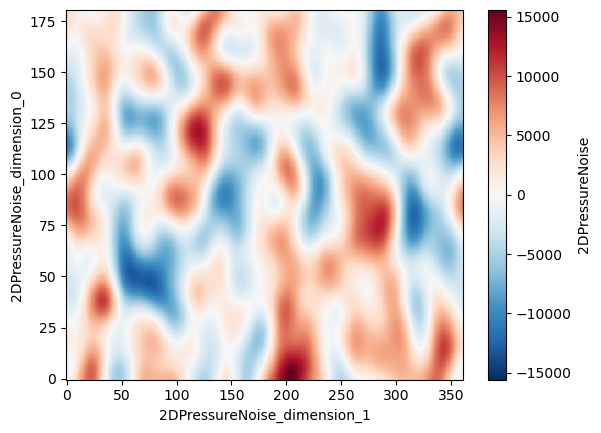

In [7]:
nc = xr.load_dataset(
    "/home/mverlaan/einf220/fromDavid/saved_results/gtsm/kg_backwards/kgStorage_201406020000/kalmanGainStorage.nc"
)
nc["2DPressureNoise"].sum(dim="station_dimension").plot()

<Figure size 640x480 with 0 Axes>

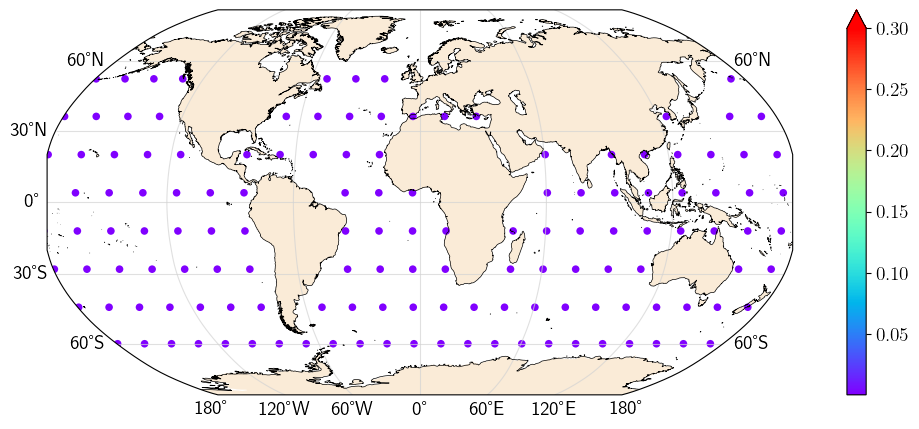

<Figure size 640x480 with 0 Axes>

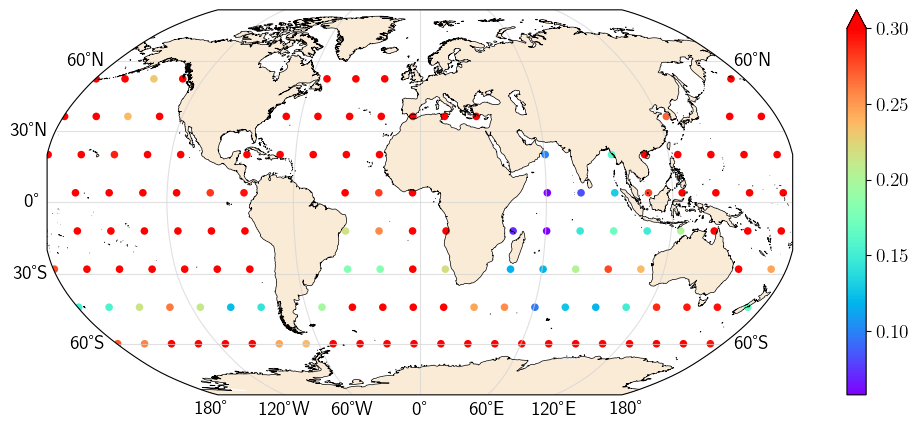

<Figure size 640x480 with 0 Axes>

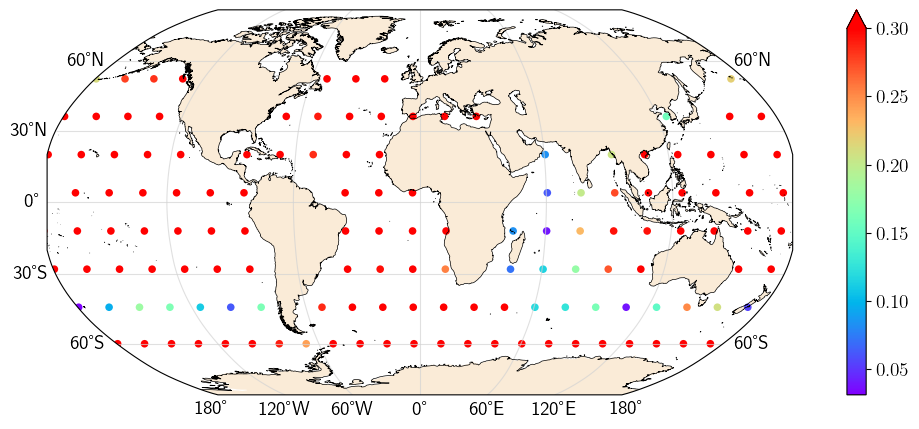

In [20]:
for rmses in rmses_per_exp:
    Plotter.plot_map(
        xs_locs,
        ys_locs,
        rmses,
        size=30,
        zorder_land=-1,
        cmap="rainbow",
        path="rmses.png",
        vmax=0.3,
        extent=(-180, 180, -90, 90),
    )
    plt.show()